In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn import metrics

In [5]:
import matplotlib.pyplot as plt

#### 数据处理

GDP数据集

In [6]:
GDP=pd.read_csv("D:/Desktop/stage 2020/Institut/Datasets/MER_TC1.csv")
GDP=GDP.loc[GDP['Description']=='U.S. Gross Domestic Product, Nominal']
GDP['Year']=GDP['YYYYMM'].astype(str).str[0:4]
GDP.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Year
213,GDPRVUS,194913,272.5,4,"U.S. Gross Domestic Product, Nominal",Billion Dollars,1949
214,GDPRVUS,195013,299.8,4,"U.S. Gross Domestic Product, Nominal",Billion Dollars,1950
215,GDPRVUS,195113,346.9,4,"U.S. Gross Domestic Product, Nominal",Billion Dollars,1951
216,GDPRVUS,195213,367.3,4,"U.S. Gross Domestic Product, Nominal",Billion Dollars,1952
217,GDPRVUS,195313,389.2,4,"U.S. Gross Domestic Product, Nominal",Billion Dollars,1953


In [7]:
GDP=pd.DataFrame(GDP,columns=['Year','Value'])
GDP=GDP.rename(columns={'Value':'GDP'})
GDP['Year']=GDP['Year'].astype(int)
GDP=GDP.loc[GDP['Year']>=1973]

能源数据集

In [8]:
data = pd.read_csv("D:/Desktop/Total_Energy_Monthly_Data_By_Sector.csv")
industrial=data.loc[data['Sector']=='Industrial']
commercial=data.loc[data['Sector']=='Commercial']
residential=data.loc[data['Sector']=='Residential']
transportation=data.loc[data['Sector']=='Transportation']

合并

In [9]:
tmp_industrial=pd.merge(industrial,GDP,on='Year',how='inner')
tmp_commercial=pd.merge(commercial,GDP,on='Year',how='inner')
tmp_residential=pd.merge(residential,GDP,on='Year',how='inner')
tmp_transportation=pd.merge(transportation,GDP,on='Year',how='inner')

In [10]:
tmp_industrial['GDP']=tmp_industrial['GDP'].astype(float)
tmp_commercial['GDP']=tmp_commercial['GDP'].astype(float)
tmp_residential['GDP']=tmp_residential['GDP'].astype(float)
tmp_transportation['GDP']=tmp_transportation['GDP'].astype(float)

In [11]:
tmp_industrial['Value']=tmp_industrial['Value']*1000/tmp_industrial['GDP']
tmp_commercial['Value']=tmp_commercial['Value']*1000/tmp_commercial['GDP']
tmp_residential['Value']=tmp_residential['Value']*1000/tmp_residential['GDP']
tmp_transportation['Value']=tmp_transportation['Value']*1000/tmp_transportation['GDP']

In [12]:
tmp_industrial=pd.DataFrame(tmp_industrial,columns=['Date','Energy_type','Value'])
tmp_commercial=pd.DataFrame(tmp_commercial,columns=['Date','Energy_type','Value'])
tmp_residential=pd.DataFrame(tmp_residential,columns=['Date','Energy_type','Value'])
tmp_transportation=pd.DataFrame(tmp_transportation,columns=['Date','Energy_type','Value'])

In [13]:
Ind=tmp_industrial.pivot('Date','Energy_type','Value')
Com=tmp_commercial.pivot('Date','Energy_type','Value')
Res=tmp_residential.pivot('Date','Energy_type','Value')
Trans=tmp_transportation.pivot('Date','Energy_type','Value')

In [14]:
Ind=Ind.fillna(method="backfill")
Com=Com.fillna(method="backfill")
Res=Res.fillna(method="backfill")
Trans=Trans.fillna(method="backfill")

In [15]:
Res=Res.fillna(method="pad")
Res

Energy_type,Biomass Energy,Coal,Electricity Retail Sales to the Residential Sector,Geothermal Energy,Natural Gas (Excluding Supplemental Gaseous Fuels),Petroleum,Residential Sector Electrical System Energy Losses,Solar Energy,Total Energy,Total Fossil Fuels,Total Primary Energy,Total Renewable Energy
Date,,,,,,,,,,,,
1973/01,21.098639,8.344324,126.484496,0.075333,603.885225,306.246668,307.338993,0.495959,1373.397643,918.476217,939.574856,21.098639
1973/02,19.057107,7.147467,118.731584,0.075333,534.781816,263.274169,258.175951,0.495959,1201.166690,805.202750,824.259155,19.057107
1973/03,21.098639,5.612460,110.865020,0.075333,464.062018,199.120247,258.648800,0.495959,1059.407184,668.794724,689.893363,21.098639
1973/04,20.418128,3.674056,100.107338,0.075333,333.368879,144.426126,228.242599,0.495959,830.237828,481.469763,501.887891,20.418128
1973/05,21.098639,3.727375,95.329732,0.075333,233.505683,117.642767,234.690613,0.495959,705.995510,354.876526,375.974463,21.098639
...,...,...,...,...,...,...,...,...,...,...,...,...
2019/08,2.095979,0.059854,23.813148,0.156946,4.917887,2.298100,44.750020,1.247217,79.279297,7.215987,10.716129,3.500142
2019/09,2.028356,0.059854,20.879096,0.151906,5.318630,1.717917,38.032687,1.103012,69.231555,7.036546,10.319773,3.283227
2019/10,2.095979,0.059854,17.139217,0.156946,11.256504,2.958974,30.524321,0.971219,65.103208,14.215478,17.439623,3.224144


In [16]:
Ind.corr()

Energy_type,Biomass Energy,Coal,Conventional Hydroelectric Power,Electricity Retail Sales to the Industrial Sector,Geothermal Energy,Industrial Sector Electrical System Energy Losses,Natural Gas (Excluding Supplemental Gaseous Fuels),Petroleum (Excluding Biofuels),Solar Energy,Total Energy,Total Fossil Fuels,Total Primary Energy,Total Renewable Energy,Wind Energy
Energy_type,,,,,,,,,,,,,,
Biomass Energy,1.000000,0.931936,0.928741,0.970292,0.179974,0.965838,0.908026,0.946990,-0.422536,0.951884,0.935494,0.941553,0.999940,-0.371757
Coal,0.931936,1.000000,0.955219,0.974397,0.139525,0.970039,0.973799,0.983113,-0.343279,0.989520,0.990455,0.990591,0.934664,-0.301997
Conventional Hydroelectric Power,0.928741,0.955219,1.000000,0.957968,0.271570,0.960134,0.926374,0.948111,-0.442900,0.956329,0.948099,0.950155,0.932723,-0.390527
Electricity Retail Sales to the Industrial Sector,0.970292,0.974397,0.957968,1.000000,0.218065,0.995244,0.953338,0.988508,-0.431803,0.989599,0.979367,0.981918,0.971917,-0.386075
Geothermal Energy,0.179974,0.139525,0.271570,0.218065,1.000000,0.220553,0.148570,0.166681,-0.746818,0.174381,0.155903,0.157697,0.182133,-0.716096
Industrial Sector Electrical System Energy Losses,0.965838,0.970039,0.960134,0.995244,0.220553,1.000000,0.950725,0.985900,-0.430416,0.987878,0.976437,0.978912,0.967653,-0.384468
Natural Gas (Excluding Supplemental Gaseous Fuels),0.908026,0.973799,0.926374,0.953338,0.148570,0.950725,1.000000,0.969162,-0.332138,0.984111,0.991330,0.990206,0.910585,-0.288470
Petroleum (Excluding Biofuels),0.946990,0.983113,0.948111,0.988508,0.166681,0.985900,0.969162,1.000000,-0.370536,0.995379,0.992352,0.993126,0.949054,-0.328483
Solar Energy,-0.422536,-0.343279,-0.442900,-0.431803,-0.746818,-0.430416,-0.332138,-0.370536,1.000000,-0.377698,-0.352681,-0.357280,-0.422700,0.882465


In [17]:
Com.corr()

Energy_type,Biomass Energy,Coal,Commercial Sector Electrical System Energy Losses,Conventional Hydroelectric Power,Electricity Retail Sales to the Commercial Sector,Geothermal Energy,Natural Gas (Excluding Supplemental Gaseous Fuels),Petroleum (Excluding Biofuels),Solar Energy,Total Energy,Total Fossil Fuels,Total Primary Energy,Total Renewable Energy,Wind Energy
Energy_type,,,,,,,,,,,,,,
Biomass Energy,1.000000,-0.380741,-0.302365,0.495028,-0.319200,-0.095571,-0.312288,-0.404639,-0.159681,-0.350822,-0.352027,-0.348480,0.912579,-0.154853
Coal,-0.380741,1.000000,0.859119,0.253544,0.872829,-0.625470,0.890688,0.961558,-0.370241,0.960310,0.934268,0.933852,-0.566556,-0.349001
Commercial Sector Electrical System Energy Losses,-0.302365,0.859119,1.000000,0.333919,0.991596,-0.744846,0.691256,0.826684,-0.505210,0.927652,0.755929,0.755149,-0.549786,-0.493973
Conventional Hydroelectric Power,0.495028,0.253544,0.333919,1.000000,0.321880,-0.670473,0.235082,0.210612,-0.316736,0.297861,0.231262,0.233324,0.306255,-0.300087
Electricity Retail Sales to the Commercial Sector,-0.319200,0.872829,0.991596,0.321880,1.000000,-0.747396,0.704295,0.839557,-0.497416,0.933211,0.769156,0.768341,-0.563865,-0.488661
Geothermal Energy,-0.095571,-0.625470,-0.744846,-0.670473,-0.747396,1.000000,-0.534496,-0.566151,0.602114,-0.689758,-0.557805,-0.558126,0.220745,0.573902
Natural Gas (Excluding Supplemental Gaseous Fuels),-0.312288,0.890688,0.691256,0.235082,0.704295,-0.534496,1.000000,0.935897,-0.327881,0.907739,0.990780,0.990952,-0.474436,-0.286889
Petroleum (Excluding Biofuels),-0.404639,0.961558,0.826684,0.210612,0.839557,-0.566151,0.935897,1.000000,-0.309792,0.966753,0.974866,0.974570,-0.562641,-0.286267
Solar Energy,-0.159681,-0.370241,-0.505210,-0.316736,-0.497416,0.602114,-0.327881,-0.309792,1.000000,-0.438237,-0.328709,-0.328327,0.247889,0.915295


In [18]:
Res.corr()

Energy_type,Biomass Energy,Coal,Electricity Retail Sales to the Residential Sector,Geothermal Energy,Natural Gas (Excluding Supplemental Gaseous Fuels),Petroleum,Residential Sector Electrical System Energy Losses,Solar Energy,Total Energy,Total Fossil Fuels,Total Primary Energy,Total Renewable Energy
Energy_type,,,,,,,,,,,,
Biomass Energy,1.000000,0.623839,0.838648,-0.554578,0.604650,0.650475,0.840481,-0.060169,0.771700,0.630504,0.663916,0.999594
Coal,0.623839,1.000000,0.846016,-0.328373,0.806454,0.942608,0.834089,-0.077191,0.904921,0.866451,0.870022,0.621605
Electricity Retail Sales to the Residential Sector,0.838648,0.846016,1.000000,-0.541712,0.725096,0.835712,0.992955,-0.081666,0.918942,0.774827,0.793857,0.837130
Geothermal Energy,-0.554578,-0.328373,-0.541712,1.000000,-0.364634,-0.368915,-0.548843,-0.046646,-0.474966,-0.372423,-0.390118,-0.554189
Natural Gas (Excluding Supplemental Gaseous Fuels),0.604650,0.806454,0.725096,-0.364634,1.000000,0.923700,0.711149,-0.159396,0.933409,0.991817,0.989680,0.600995
Petroleum,0.650475,0.942608,0.835712,-0.368915,0.923700,1.000000,0.826428,-0.108210,0.964361,0.965044,0.966517,0.647848
Residential Sector Electrical System Energy Losses,0.840481,0.834089,0.992955,-0.548843,0.711149,0.826428,1.000000,-0.077729,0.912287,0.762147,0.781757,0.839278
Solar Energy,-0.060169,-0.077191,-0.081666,-0.046646,-0.159396,-0.108210,-0.077729,1.000000,-0.124165,-0.145110,-0.141749,-0.033792
Total Energy,0.771700,0.904921,0.918942,-0.474966,0.933409,0.964361,0.912287,-0.124165,1.000000,0.959960,0.968443,0.769073


In [19]:
Trans.corr()

Energy_type,Biomass Energy,Coal,Electricity Retail Sales to the Transportation Sector,Natural Gas (Excluding Supplemental Gaseous Fuels),Petroleum (Excluding Biofuels),Total Energy,Total Fossil Fuels,Total Primary Energy,Transportation Sector Electrical System Energy Losses
Energy_type,,,,,,,,,
Biomass Energy,1.000000,-0.189296,-0.632140,-0.552217,-0.648289,-0.641050,-0.646306,-0.641029,-0.645361
Coal,-0.189296,1.000000,0.591132,0.584885,0.571147,0.574813,0.573125,0.574773,0.586622
Electricity Retail Sales to the Transportation Sector,-0.632140,0.591132,1.000000,0.937562,0.978678,0.979599,0.979548,0.979543,0.992726
Natural Gas (Excluding Supplemental Gaseous Fuels),-0.552217,0.584885,0.937562,1.000000,0.931514,0.936792,0.936308,0.936768,0.931440
Petroleum (Excluding Biofuels),-0.648289,0.571147,0.978678,0.931514,1.000000,0.999867,0.999910,0.999868,0.981415
Total Energy,-0.641050,0.574813,0.979599,0.936792,0.999867,1.000000,0.999976,1.000000,0.981911
Total Fossil Fuels,-0.646306,0.573125,0.979548,0.936308,0.999910,0.999976,1.000000,0.999976,0.981964
Total Primary Energy,-0.641029,0.574773,0.979543,0.936768,0.999868,1.000000,0.999976,1.000000,0.981854
Transportation Sector Electrical System Energy Losses,-0.645361,0.586622,0.992726,0.931440,0.981415,0.981911,0.981964,0.981854,1.000000


#### 由此可以看出：

Solar Energy、Geothermal Energy和Wind Energy与Industrial不相关

Biomass Energy、Conventional Hydroelectric Power、Geothermal Energy、Solar Energy、Total Renewable Energy和Wind Energy与Commercial不相关

Geothermal Energy、Solar Energy与Residential不相关

Biomass Energy与Transportation不相关,Coal与Transportation低相关

#### 删除不相关的列，以及重复项和空白行

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


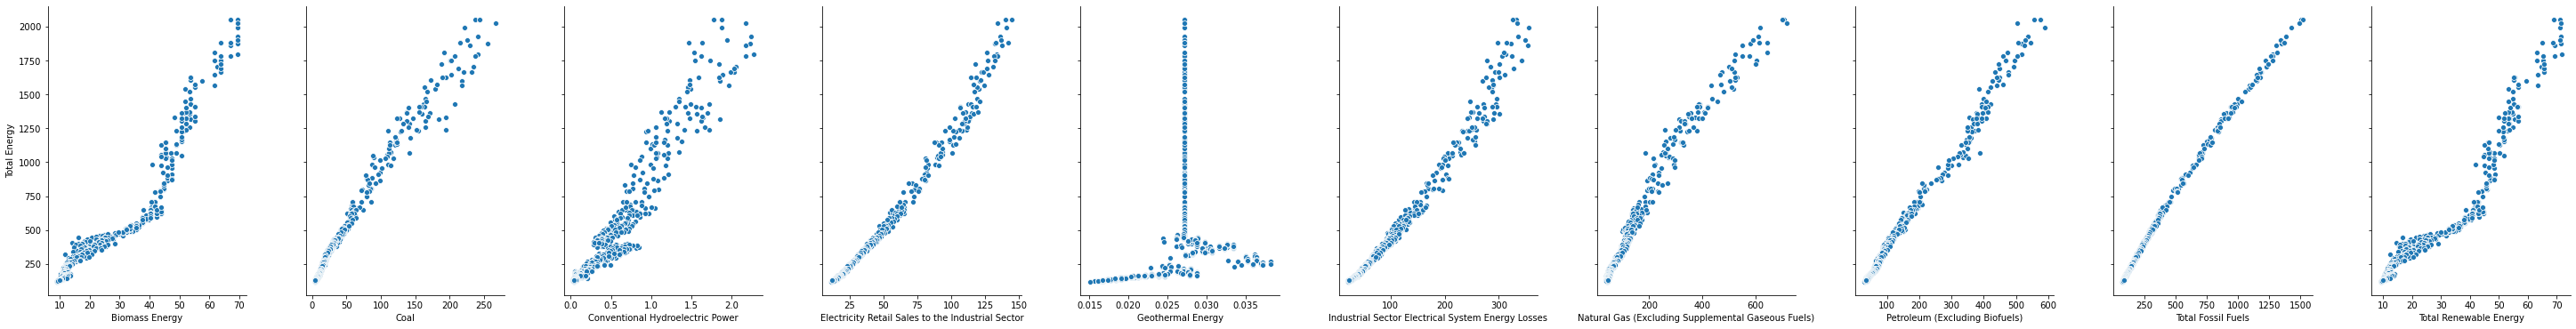

In [20]:
sns.pairplot(Ind, x_vars=['Biomass Energy','Coal','Conventional Hydroelectric Power','Electricity Retail Sales to the Industrial Sector','Geothermal Energy','Industrial Sector Electrical System Energy Losses','Natural Gas (Excluding Supplemental Gaseous Fuels)','Petroleum (Excluding Biofuels)','Total Fossil Fuels','Total Renewable Energy'], y_vars='Total Energy', size=5, aspect=0.8) 

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


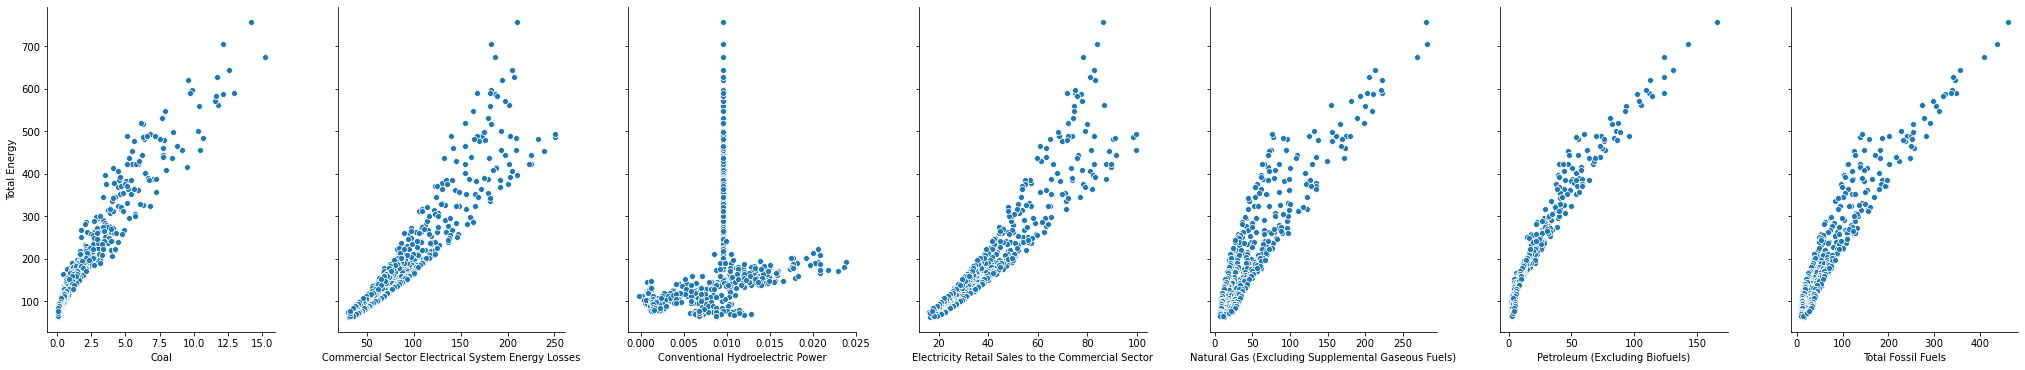

In [21]:
sns.pairplot(Com, x_vars=['Coal','Commercial Sector Electrical System Energy Losses','Conventional Hydroelectric Power','Electricity Retail Sales to the Commercial Sector','Natural Gas (Excluding Supplemental Gaseous Fuels)','Petroleum (Excluding Biofuels)','Total Fossil Fuels'], y_vars='Total Energy', size=5, aspect=0.8) 

Conventional Hydroelectric Power与Commercial低相关

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


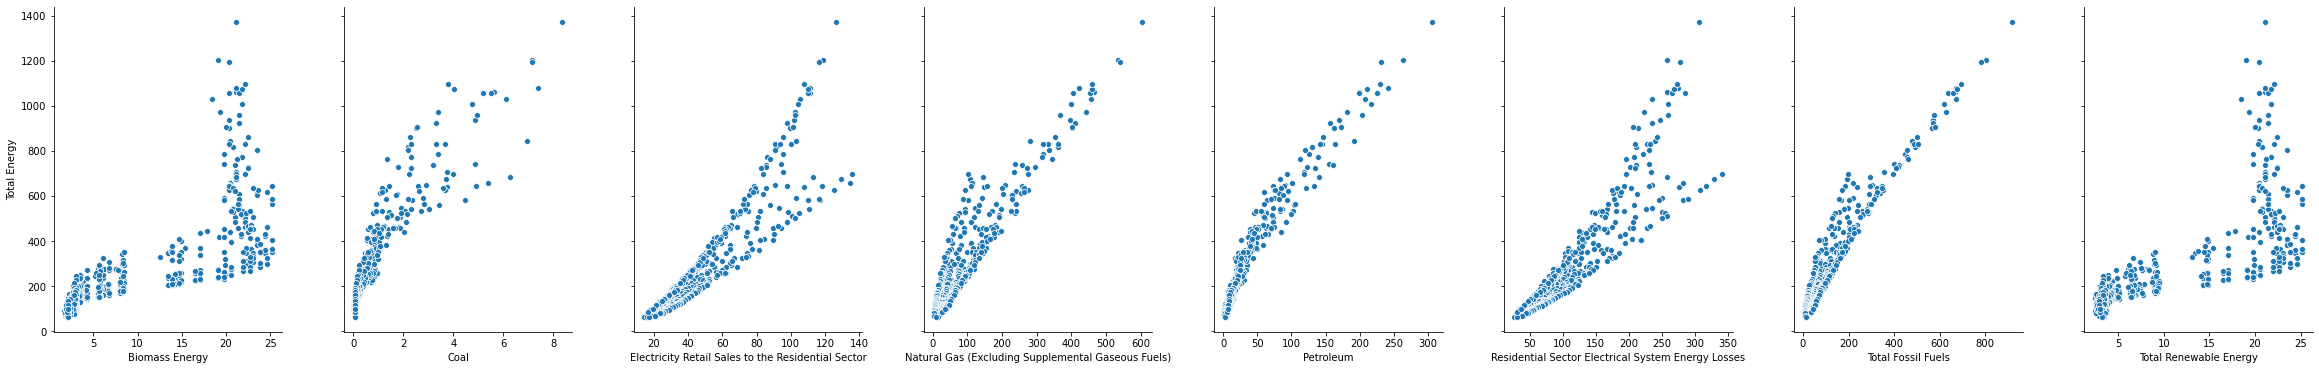

In [22]:
sns.pairplot(Res, x_vars=['Biomass Energy','Coal','Electricity Retail Sales to the Residential Sector','Natural Gas (Excluding Supplemental Gaseous Fuels)','Petroleum','Residential Sector Electrical System Energy Losses','Total Fossil Fuels','Total Renewable Energy'], y_vars='Total Energy', size=5, aspect=0.8) 

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


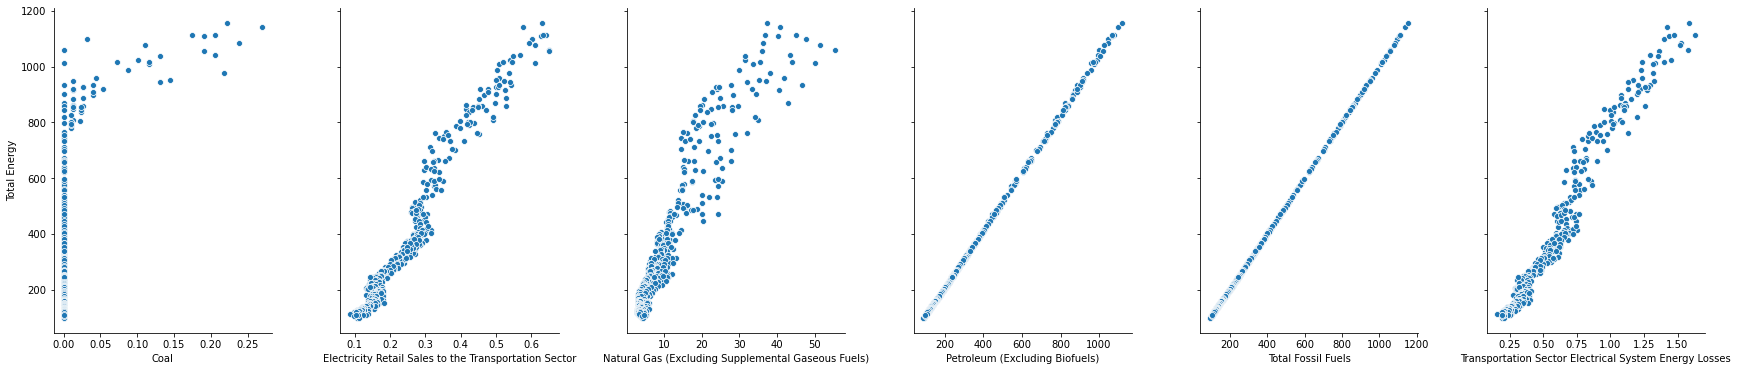

In [23]:
sns.pairplot(Trans, x_vars=['Coal','Electricity Retail Sales to the Transportation Sector','Natural Gas (Excluding Supplemental Gaseous Fuels)','Petroleum (Excluding Biofuels)','Total Fossil Fuels','Transportation Sector Electrical System Energy Losses'], y_vars='Total Energy', size=5, aspect=0.8) 

In [24]:
Ind=Ind.drop(columns=['Solar Energy','Geothermal Energy','Wind Energy','Total Primary Energy'])
Com=Com.drop(columns=['Biomass Energy','Conventional Hydroelectric Power','Geothermal Energy','Solar Energy','Total Renewable Energy','Wind Energy','Total Primary Energy'])
Res=Res.drop(columns=['Geothermal Energy','Solar Energy','Total Primary Energy'])
Trans=Trans.drop(columns=['Coal','Biomass Energy','Total Primary Energy'])

### 多元线性回归

#### Industrial回归

In [25]:
X = Ind.drop(columns=['Total Energy'])
Y = Ind['Total Energy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [26]:
linreg = LinearRegression()

In [27]:
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

6.005627085414744e-06
[-5.78111116e-05  3.31598966e-06  3.03443558e-05  1.00000642e+00
  9.99999019e-01  1.73677912e-06 -1.05191165e-08  9.99998173e-01
  1.00005550e+00]


In [28]:
Y_pred = linreg.predict(X_test)
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MSE 2.4537742514090496e-08
RMSE 0.00015664527606694845


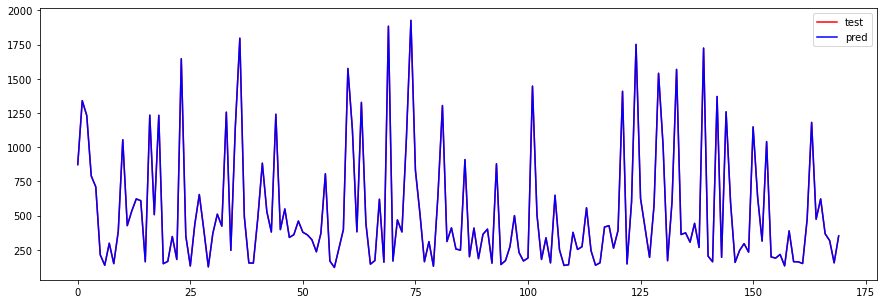

In [29]:
plt.figure(figsize=(15,5))
plt.plot(range(len(Y_test)), Y_test, 'r', label='test')
plt.plot(range(len(Y_pred)), Y_pred, 'b', label='pred')
plt.legend()

In [30]:
metrics.r2_score(Y_test,Y_pred)

0.9999999999998704

RMSE极小，R2极接近100%，过拟合

#### Commercial回归

In [31]:
X = Com.drop(columns=['Total Energy'])
Y = Com['Total Energy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [32]:
linreg = LinearRegression()

In [33]:
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

1.151976641648048
[-60.09404167   1.00317418   0.98674835 -60.08267089 -60.08968343
  61.08403236]


In [34]:
Y_pred = linreg.predict(X_test)
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MSE 0.07454437593750166
RMSE 0.27302815960538146


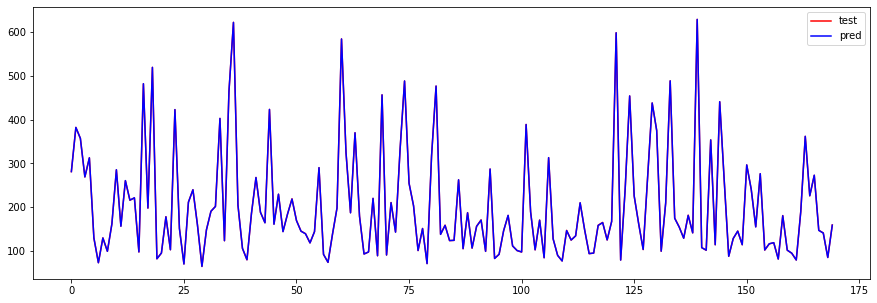

In [35]:
plt.figure(figsize=(15,5))
plt.plot(range(len(Y_test)), Y_test, 'r', label='test')
plt.plot(range(len(Y_pred)), Y_pred, 'b', label='pred')
plt.legend()

In [36]:
metrics.r2_score(Y_test,Y_pred)

0.999995125268659

#### Residential回归

In [37]:
X = Res.drop(columns=['Total Energy'])
Y = Res['Total Energy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [38]:
Res.isnull().sum()

Energy_type
Biomass Energy                                        0
Coal                                                  0
Electricity Retail Sales to the Residential Sector    0
Natural Gas (Excluding Supplemental Gaseous Fuels)    0
Petroleum                                             0
Residential Sector Electrical System Energy Losses    0
Total Energy                                          0
Total Fossil Fuels                                    0
Total Renewable Energy                                0
dtype: int64

In [39]:
linreg = LinearRegression()

In [40]:
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

-1.2748206188462063e-05
[-3.35690814e-05 -3.85663707e-04  1.00000742e+00 -3.91168190e-04
 -3.89320143e-04  9.99996993e-01  1.00039043e+00  1.00003155e+00]


In [41]:
Y_pred = linreg.predict(X_test)
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MSE 2.503844045258368e-08
RMSE 0.00015823539570078397


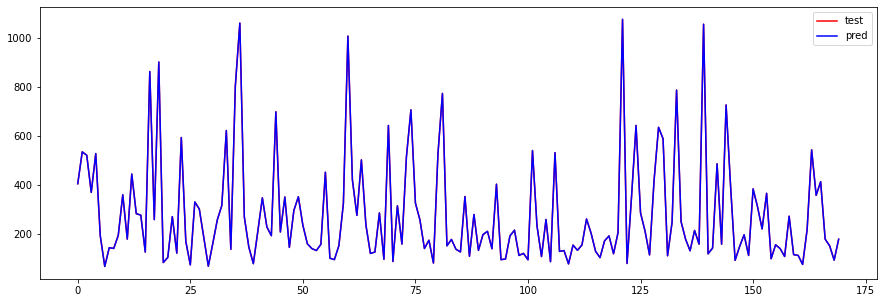

In [42]:
plt.figure(figsize=(15,5))
plt.plot(range(len(Y_test)), Y_test, 'r', label='test')
plt.plot(range(len(Y_pred)), Y_pred, 'b', label='pred')
plt.legend()

In [43]:
metrics.r2_score(Y_test,Y_pred)

0.9999999999994656

#### Transportation回归

In [44]:
X = Trans.drop(columns=['Total Energy'])
Y = Trans['Total Energy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [45]:
linreg = LinearRegression()

In [46]:
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

5.219252657073525
[  6.21066799 -19.87154143 -19.96154657  20.95576229  -5.31101354]


In [47]:
Y_pred = linreg.predict(X_test)
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MSE 2.47945686693343
RMSE 1.5746291204386607


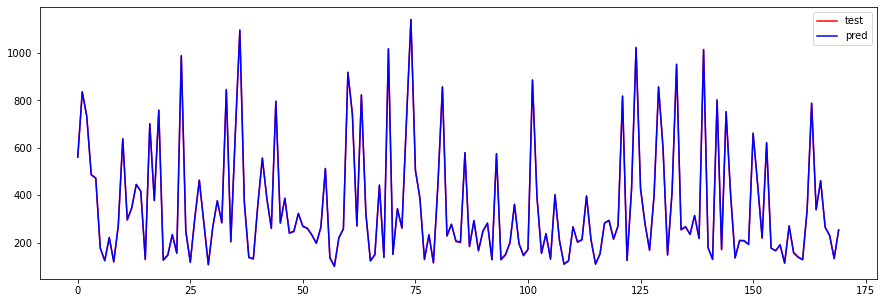

In [48]:
plt.figure(figsize=(15,5))
plt.plot(range(len(Y_test)), Y_test, 'r', label='test')
plt.plot(range(len(Y_pred)), Y_pred, 'b', label='pred')
plt.legend()

In [49]:
metrics.r2_score(Y_test,Y_pred)

0.9999592667585381